## Q1. What is a projection and how is it used in PCA?

A **projection** in the context of linear algebra and data analysis refers to the transformation of data from a higher-dimensional space to a lower-dimensional space. This process involves mapping each data point onto a new set of axes, often for the purposes of reducing dimensionality while retaining as much of the original information as possible.

In **Principal Component Analysis (PCA)**, projection plays a crucial role. Here's how it is used:

1. **Centering the Data:** Before performing PCA, the data is centered by subtracting the mean of each feature from the data points. This ensures that the data is centered around the origin in the multidimensional space.

2. **Computing the Covariance Matrix:** The covariance matrix of the centered data is computed to understand how the features of the data vary with respect to each other.

3. **Eigen Decomposition:** The covariance matrix is then decomposed into its eigenvalues and eigenvectors. The eigenvectors represent the directions **(principal components)** in the feature space along which the data varies the most, and the **eigenvalues** indicate the magnitude of this variance.

4. **Selecting Principal Components:** The eigenvectors are sorted by their corresponding eigenvalues in descending order. The top $k$ eigenvectors (where $k$ is the number of dimensions we want to reduce to) are selected. These top eigenvectors form the new basis for the lower-dimensional space.

5. **Projecting the Data:** The original data is projected onto the new basis formed by the selected eigenvectors. Mathematically, this involves multiplying the original data matrix by the matrix of the selected eigenvectors. This projection transforms the data from the original high-dimensional space to a lower-dimensional space, while preserving as much of the variance (information) as possible.

## Q2. How does the optimization problem in PCA work, and what is it trying to achieve?

The optimization problem in Principal Component Analysis (PCA) is focused on finding the principal components that capture the maximum variance in the data. Here's a detailed explanation of how this optimization problem works and what it aims to achieve:

##### Objective of PCA

The main goal of PCA is to find a new set of orthogonal axes (principal components) such that:

1. The first principal component accounts for the maximum possible variance in the data.

2. Each succeeding principal component accounts for the maximum variance possible under the constraint that it is orthogonal to the preceding components.

##### Optimization Problem in PCA

The optimization problem can be formulated as follows:

1. **Maximizing Variance:** Find the principal components by maximizing the variance of the projected data.

2. **Orthogonality Constraint:** Ensure that the principal components are orthogonal to each other.

##### Intuition Behind the Optimization

1. **Variance Maximization:** By maximizing the variance, PCA ensures that the principal components capture the most significant patterns in the data. High variance indicates that the principal component explains a substantial amount of the data's variability.

2. **Orthogonality:** Ensuring that principal components are orthogonal means that each component captures a unique aspect of the data's variance. This avoids redundancy and ensures that each principal component provides new information.

In the previous question, we have also seen how to perform PCA which in turn helps to address the optimization problem as well.

## Q3. What is the relationship between covariance matrices and PCA?

The relationship between covariance matrices and Principal Component Analysis (PCA) is fundamental, as the covariance matrix is a key element in determining the principal components. 

##### Covariance Matrix in PCA

1. **Definition:** The covariance matrix captures the covariance (a measure of how much two random variables change together) between each pair of features in a dataset. For a dataset $ X \in \mathbb{R}^{n \times p} $, where $n$ is the number of samples and $p$ is the number of features, the covariance matrix $C$ is a $p×p$ symmetric matrix defined as:

$$ C = \frac{1}{n - 1} X_{centered}^T X_{centered} $$

2. **Role in PCA:** The covariance matrix encapsulates the spread and the relationships between the different dimensions (features) of the data. PCA leverages the covariance matrix to identify directions (principal components) along which the variance of the data is maximized.

## Q4. How does the choice of number of principal components impact the performance of PCA?

The choice of the number of **principal components** in **Principal Component Analysis (PCA)** significantly impacts the performance of PCA in terms of information retention, dimensionality reduction, computational efficiency, and downstream tasks such as data visualization and machine learning.

##### Impact of the Number of Principal Components

1. **Information Retention:**

    - **More Principal Components:** Retaining more principal components helps preserve more of the original data's variance and information. If we keep all $p$ principal components, we retain all the information.
    
    - **Fewer Principal Components:** Reducing the number of principal components results in some loss of information, as only the components capturing the most variance are retained. However, the goal is to capture most of the essential information with fewer components.
    
    
2. **Dimensionality Reduction:**

    - **High Number of Components:** If the number of components is high, the dimensionality reduction effect is minimal, and the data might still be high-dimensional, which can be computationally expensive.
    
    - **Low Number of Components:** Fewer components result in a lower-dimensional representation of the data, which can simplify the dataset, making it easier to visualize and work with, especially in machine learning tasks.
    
    
3. **Computational Efficiency:**

    - **More Principal Components:** Retaining more components requires more computational resources, both in terms of storage and processing, especially for large datasets.
    
    - **Fewer Principal Components:** Reducing the number of components can significantly decrease the computational load, making data processing and analysis faster and less resource-intensive.
    
    
4. **Overfitting vs. Underfitting:**

    - **More Principal Components:** Keeping too many components might lead to overfitting, especially in machine learning, as the model might capture noise along with the signal.

    - **Fewer Principal Components:** Retaining too few components can lead to underfitting, where important patterns and structures in the data might be lost, resulting in poor performance of the model.
    
    
5. **Visualization:**

    - **2 or 3 Principal Components:** For visualization purposes, reducing the data to 2 or 3 principal components is common, as it allows plotting in 2D or 3D, making it easier to see patterns and clusters in the data.

    - **More than 3 Components:** While not useful for direct visualization, retaining more components can still be beneficial for other analysis and modeling tasks.
    
    
##### Choosing the Number of Principal Components

1. **Explained Variance:**

    - A common approach is to look at the explained variance ratio or the cumulative explained variance. The explained variance indicates how much information (variance) is captured by each principal component.
    - Typically, we select the number of components that explain a high percentage of the total variance (e.g., 95%). This ensures that we are retaining most of the important information while reducing dimensionality.


2. **Scree Plot:**

    - A scree plot shows the eigenvalues (explained variance) associated with each principal component. The **"elbow" point**, where the explained variance starts to level off, can be a good indicator of the optimal number of components.


3. **Cross-Validation:**

    - In machine learning tasks, cross-validation can help determine the optimal number of components by evaluating the performance of the model with different numbers of components and choosing the one that gives the best performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n_samples = 100
n_features = 5

X = np.random.randn(n_samples, n_features)

df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(n_features)])

df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383


Cumulative variance ratio is : [0.26256655 0.47836348 0.68055764 0.86183072 1.        ]


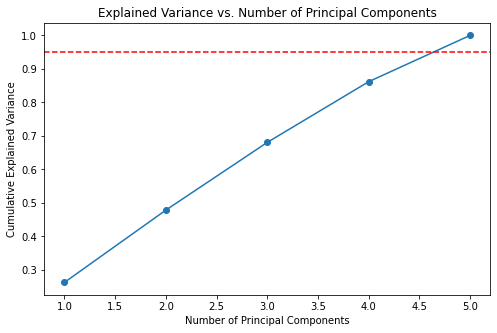

In [6]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative variance ratio is : {cumulative_explained_variance}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


## Q5. How can PCA be used in feature selection, and what are the benefits of using it for this purpose?

**Principal Component Analysis (PCA)** can be effectively used for feature selection in several ways. While PCA is primarily a dimensionality reduction technique, it also helps in identifying the most important features that contribute to the variance in the data. Here’s how PCA can be used for feature selection and the benefits of doing so:

##### Using PCA for Feature Selection


1. **Dimensionality Reduction:** PCA transforms the original features into a new set of orthogonal features (principal components), which are linear combinations of the original features. By selecting the top principal components that capture the most variance, we effectively reduce the number of features while retaining most of the important information.

2. **Feature Importance:** The principal components are ordered by the amount of variance they explain. By examining the loadings of the original features on these principal components, we can identify which original features contribute the most to the variance in the data.


##### Benefits of Using PCA for Feature Selection


1. **Variance Preservation:** PCA selects components that maximize the variance, ensuring that the selected features capture the most significant patterns in the data.


2. **Noise Reduction:** By focusing on the components with the highest variance, PCA can help reduce the impact of noise and less informative features, leading to potentially better model performance.


3. **Collinearity Handling:** PCA transforms correlated features into uncorrelated principal components, which can help in dealing with multicollinearity issues in the data.


4. **Improved Model Performance:** Reducing the number of features can lead to simpler and faster models, reducing the risk of overfitting and improving generalization to new data.


5. **Visualization:** Reducing data to 2 or 3 principal components allows for easier visualization, helping to understand the structure and relationships within the data.

## Q6. What are some common applications of PCA in data science and machine learning?

Principal Component Analysis (PCA) is a versatile tool used in various applications in data science and machine learning due to its ability to reduce dimensionality, extract features, and identify patterns in the data. Here are some common applications of PCA:

**1.** Dimensionality Reduction (Handling high-dimensional data)  
**2.** Data Visualization (Exploratory data analysis)  
**3.** Noise Reduction (Image denoising)  
**4.** Feature Extraction (Natural language processing, Bioinformatics)  
**5.** Anomaly Detection (Fraud detection, Quality Control)  
**6.** Multivariate Time Series Analysis (Econometrics, Climate Science)

## Q7.What is the relationship between spread and variance in PCA?

In Principal Component Analysis (PCA), the concepts of spread and variance are closely related and fundamental to understanding how PCA works. Here's a detailed explanation of their relationship:

##### Spread and Variance

1. **Spread:** The spread of data refers to how much the data points are dispersed or scattered in the feature space. It gives an indication of the variability or diversity within the dataset. Spread can be visualized by plotting the data and observing the range and distribution of the data points.

2. **Variance:** Variance is a statistical measure that quantifies the spread of data points around the mean of a dataset. It is calculated as the average of the squared differences from the mean. Mathematically, for a dataset $X$ with $n$ samples and mean $\mu$, the variance $\sigma ^2$ is:

$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \mu) ^2 $$


##### Relationship in PCA

1. **Principal Components and Variance:**

    - PCA identifies new axes (principal components) that maximize the variance in the data. Each principal component is a linear combination of the original features and is oriented in the direction of the greatest spread of the data.
    
    
2. **Explained Variance:**

    - The variance captured by each principal component is quantified by its corresponding eigenvalue. The cumulative sum of the eigenvalues of all principal components equals the total variance in the original dataset.

## Q8. How does PCA use the spread and variance of the data to identify principal components?

Principal Component Analysis (PCA) uses the spread and variance of the data to identify principal components through a series of steps involving the calculation of the covariance matrix, eigenvalues, and eigenvectors. 

##### How Spread and Variance are Used

1. **Maximizing Variance:** The principal components are directions in the feature space along which the variance of the data is maximized. The first principal component captures the direction of maximum spread (variance), the second principal component captures the next highest spread, and so on.


2. **Orthogonality:** Each principal component is orthogonal (uncorrelated) to the others, ensuring that each new component captures unique variance not explained by previous components. This orthogonality is a result of the properties of eigenvectors of the covariance matrix.

## Q9. How does PCA handle data with high variance in some dimensions but low variance in others?

Principal Component Analysis (PCA) effectively handles data with high variance in some dimensions and low variance in others through its process of transforming the original features into a set of orthogonal principal components.

##### Step-by-Step Handling of High and Low Variance Dimensions

1. **Standardization:** Before applying PCA, the data is often standardized (especially when features have different scales) to bring all features to the same scale. This ensures that features with inherently higher variance do not dominate the principal component analysis purely due to their scale.


2. **Covariance Matrix Calculation:** PCA computes the covariance matrix of the standardized data. This matrix captures how much each pair of features vary together.


3. **Eigenvalue and Eigenvector Decomposition:** PCA then performs eigenvalue decomposition on the covariance matrix to identify the eigenvalues and eigenvectors. The eigenvectors (principal components) represent directions of maximum variance, and the eigenvalues represent the magnitude of variance along these directions.


4. **Sorting and Selecting Principal Components:** The eigenvalues and corresponding eigenvectors are sorted in descending order. The principal components with the largest eigenvalues capture the highest variance.

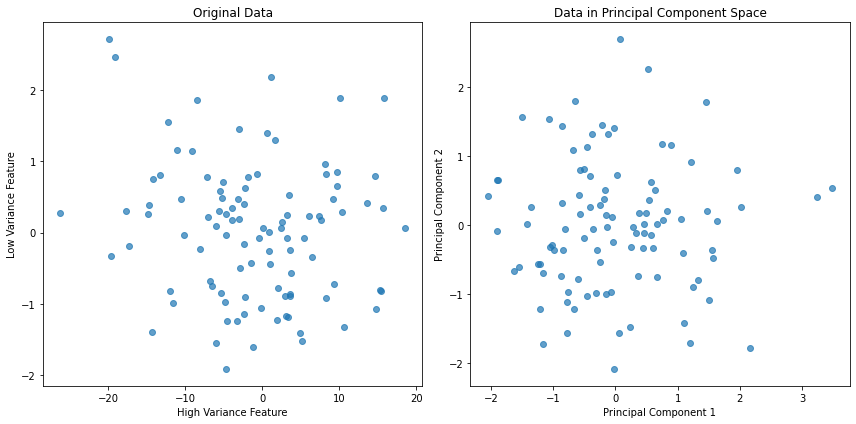

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
high_variance = np.random.normal(0, 10, 100)
low_variance = np.random.normal(0, 1, 100)
X = np.column_stack((high_variance, low_variance))

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Original Data')
plt.xlabel('High Variance Feature')
plt.ylabel('Low Variance Feature')

# Plot data in principal component space
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('Data in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()